In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
solar_projects = r"C:\Users\George\Desktop\solar_projects.csv"



In [3]:
df = pd.read_csv(solar_projects)

C:\Users\George\AppData\Local\Temp\ipykernel_26872\2684062894.py:1: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(solar_projects)


In [4]:
df.head()

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
0,01/31/2025,SDG-81649,01/28/2025,Con Ed,Brooklyn,Kings,11234,CENY-BK,Bensonhurst_1,7B02,Trinity Solar,NM,6.74,5.76,7911,NaN,1
1,01/31/2025,SDG-81519,01/29/2025,Con Ed,Brooklyn,Kings,11239,CENY-BK,Brownsville_2,9B02,SUNCO,NM,4.75,4.06,5576,NaN,1
2,01/31/2025,SDG-81517,01/28/2025,Con Ed,Hollis,Queens,11423,CENY-Q,Parkchester_1,7X81,SUNCO,NM,4.41,3.77,5178,NaN,1
3,01/31/2025,SDG-81514,01/29/2025,Con Ed,Richmond Hill,Queens,11418,CENY-BK,Jamaica,5Q41,Trinity Solar,NM,5.85,5.00,6867,NaN,1
4,01/31/2025,SDG-81432,01/28/2025,Con Ed,Staten Island,Richmond,10314,CENY-SI,Willowbrook,4R54,SUNCO,NM,7.13,6.09,8364,NaN,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244056 entries, 0 to 244055
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Data Through Date                            244056 non-null  object 
 1   Project ID                                   244053 non-null  object 
 2   Interconnection Date                         244056 non-null  object 
 3   Utility                                      244056 non-null  object 
 4   City/Town                                    244053 non-null  object 
 5   County                                       244056 non-null  object 
 6   Zip                                          244056 non-null  int64  
 7   Division                                     150947 non-null  object 
 8   Substation                                   156187 non-null  object 
 9   Circuit ID                                   244053 non-nul

In [6]:
null_cnt = df.isnull().sum().sort_values(ascending=False)
print(null_cnt)

Energy Storage System Size (kWac)              238831
Division                                        93109
Substation                                      87869
Developer                                       10322
Metering Method                                   442
City/Town                                           3
Project ID                                          3
Circuit ID                                          3
PV System Size (kWac)                               1
Estimated PV System Size (kWdc)                     1
Estimated Annual PV Energy Production (kWh)         0
Data Through Date                                   0
Zip                                                 0
County                                              0
Utility                                             0
Interconnection Date                                0
Number of Projects                                  0
dtype: int64


In [7]:
df.columns = (
    df.columns
    .str.strip()  # remove leading/trailing spaces
    .str.lower()  # make lowercase
    .str.replace(r'[^\w\s]', '', regex=True)  # remove punctuation
    .str.replace(r'\s+', '_', regex=True) # replace whitespace with underscores
)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244056 entries, 0 to 244055
Data columns (total 17 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   data_through_date                          244056 non-null  object 
 1   project_id                                 244053 non-null  object 
 2   interconnection_date                       244056 non-null  object 
 3   utility                                    244056 non-null  object 
 4   citytown                                   244053 non-null  object 
 5   county                                     244056 non-null  object 
 6   zip                                        244056 non-null  int64  
 7   division                                   150947 non-null  object 
 8   substation                                 156187 non-null  object 
 9   circuit_id                                 244053 non-null  object 
 10  develope

In [9]:
null_percentage = df['energy_storage_system_size_kwac'].isnull().mean() * 100
print(null_percentage)

97.85909791195463


In [10]:
df = df.drop(columns='energy_storage_system_size_kwac')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244056 entries, 0 to 244055
Data columns (total 16 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   data_through_date                          244056 non-null  object 
 1   project_id                                 244053 non-null  object 
 2   interconnection_date                       244056 non-null  object 
 3   utility                                    244056 non-null  object 
 4   citytown                                   244053 non-null  object 
 5   county                                     244056 non-null  object 
 6   zip                                        244056 non-null  int64  
 7   division                                   150947 non-null  object 
 8   substation                                 156187 non-null  object 
 9   circuit_id                                 244053 non-null  object 
 10  develope

In [12]:
top_cities = df.groupby('citytown')['estimated_annual_pv_energy_production_kwh'].sum().sort_values(ascending=False)
print(top_cities.head(10))

citytown
Staten Island    101179661
STATEN ISLAND     85465659
Auburn            72660953
BROOKLYN          70969773
Amsterdam         70229378
Brooklyn          70083860
Hudson            67715770
Brockport         66468983
Scotia            62298055
Ithaca            60616641
Name: estimated_annual_pv_energy_production_kwh, dtype: int64


In [13]:
# str.strip().str.title() standardizes city/town names, which helps prevent duplicates that differ only in casing or whitespace
df['citytown'] = df['citytown'].str.strip().str.title()

In [14]:
top_cities = df.groupby('citytown')['estimated_annual_pv_energy_production_kwh'].sum().sort_values(ascending=False)

# Display the top 25 cities
print(top_cities.head(25))

citytown
Staten Island    188846018
Brooklyn         141673105
Bronx             98621026
Auburn            73743627
Amsterdam         70229378
Hudson            67784220
Brockport         66489584
Ithaca            64104621
Scotia            62298055
Middletown        58508983
Schenectady       56014694
Dryden            54860885
Canastota         54306164
Olean             53406978
Batavia           50660231
Troy              49748362
Cortland          49300214
Watertown         47471159
Clay              46725844
Gloversville      44270870
Tioga             44009421
Clayton           43468404
Ogdensburg        42421740
Kingston          41859141
Albany            41048119
Name: estimated_annual_pv_energy_production_kwh, dtype: int64


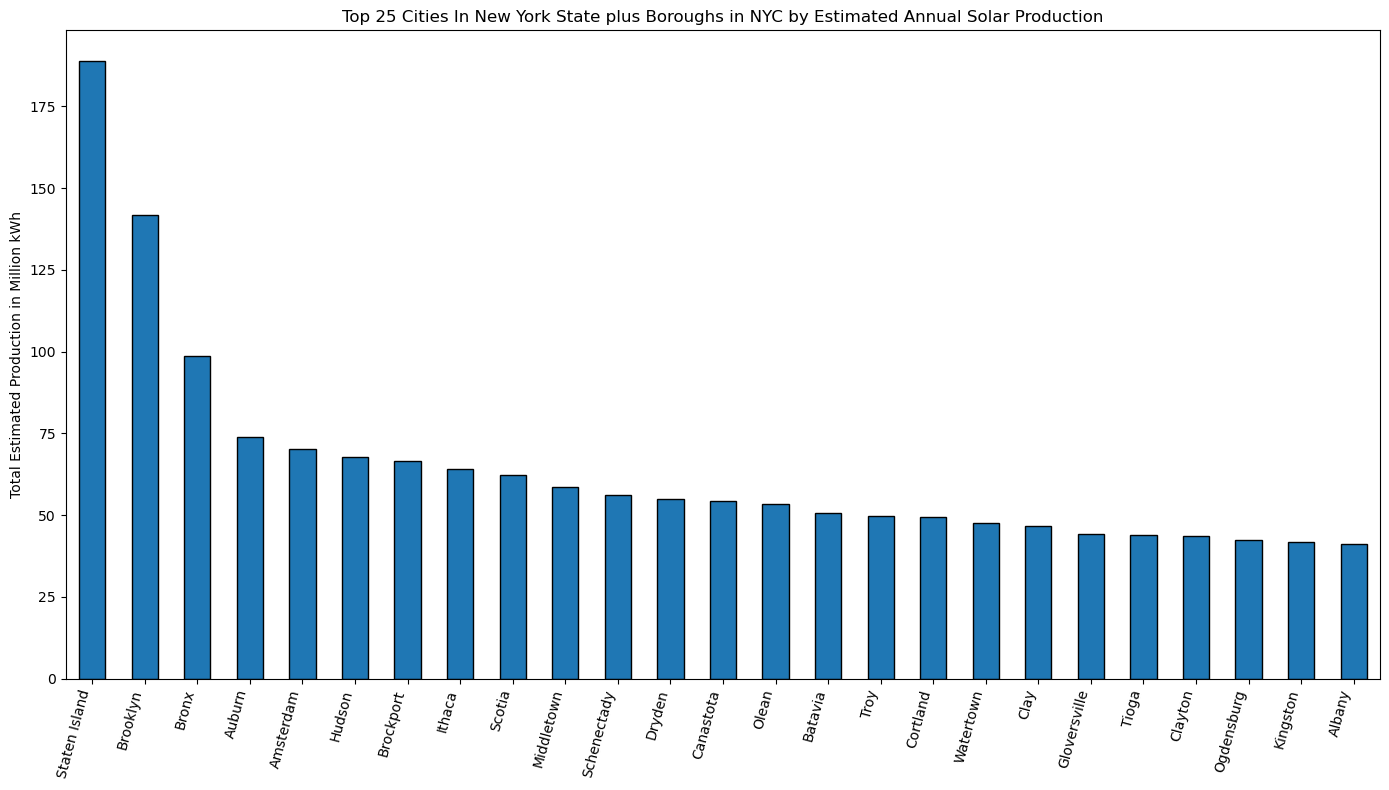

In [15]:
top_25_cities = top_cities.head(25) / 1_000_000  # convert kWh to millions

plt.figure(figsize=(14, 8))
ax = top_25_cities.plot(kind='bar', color='tab:blue', edgecolor='black')  # Adding edge color to bars

plt.title('Top 25 Cities In New York State plus Boroughs in NYC by Estimated Annual Solar Production')
plt.xlabel('')
plt.ylabel('Total Estimated Production in Million kWh')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# I'm not seeing Manhattan or Queens so I wanted to see if all NYC boroughs were in city/town and county

In [17]:
is_manhattan_present = 'Manhattan' in df['citytown'].values
print(is_manhattan_present)

False


In [18]:
is_manhattan_present_county = 'Manhattan' in df['county'].values
print(is_manhattan_present_county)

False


In [19]:
is_queens_present = 'Queens' in df['citytown'].values
print(is_queens_present)

True


In [20]:
is_queens_present_county = 'Queens' in df['county'].values
print(is_queens_present_county)

True


In [21]:
is_brooklyn_present = 'Brooklyn' in df['citytown'].values
print(is_brooklyn_present)

True


In [22]:
is_brooklyn_present_county = 'Brooklyn' in df['county'].values
print(is_brooklyn_present_county)

False


In [23]:
is_staten_present = 'Staten Island' in df['citytown'].values
print(is_staten_present)

True


In [24]:
is_staten_present_county = 'Staten Island' in df['county'].values
print(is_staten_present_county)

False


In [25]:
is_bronx_present = 'Bronx' in df['citytown'].values
print(is_bronx_present)

True


In [26]:
is_bronx_present_county = 'Bronx' in df['county'].values
print(is_staten_present_county)

False


In [27]:
# Updates the county column where the citytown is "Brooklyn", "Staten Island", or "Bronx" to match the borough name exactly.

df.loc[df['citytown'] == 'Brooklyn', 'county'] = 'Brooklyn'
df.loc[df['citytown'] == 'Staten Island', 'county'] = 'Staten Island'
df.loc[df['citytown'] == 'Bronx', 'county'] = 'Bronx'

In [28]:
print('Brooklyn' in df['county'].values)       
print('Bronx' in df['county'].values)
print('Staten Island' in df['county'].values)
print('Queens' in df['county'].values)

True
True
True
True


In [29]:
# Created a list called boroughs that contains the names as strings.
boroughs = ['Brooklyn', 'Bronx', 'Queens', 'Staten Island']

In [30]:
borough_df = df[df['county'].isin(boroughs)].copy()

In [31]:
# Aggregated the data to calculate total projects, total energy production, and average energy per borough project
borough_df_aggregated = borough_df.groupby('county').agg({
    'number_of_projects': 'sum',  # Total number of projects
    'estimated_annual_pv_energy_production_kwh': 'sum'  # Total energy production
})



In [32]:
borough_df_aggregated['avg_energy_per_project'] = borough_df_aggregated['estimated_annual_pv_energy_production_kwh'] / borough_df_aggregated['number_of_projects']
borough_df_aggregated

,number_of_projects,estimated_annual_pv_energy_production_kwh,avg_energy_per_project
county,,,
Bronx,7200,98621026,13697.364722
Brooklyn,14095,141673105,10051.302235
Queens,27592,266345396,9652.993476
Staten Island,14427,188846018,13089.763499


In [33]:
# Created a new dataframe called energy_and_projects_by_area 
# that shows the total number of solar projects and total energy production (in kWh) for each county.

# .agg Aggregates (operations that summarize or combine multiple values into one) two things:
#total_projects: The total number of projects per county.
#total_energy_production: The total estimated annual PV energy production.

energy_and_projects_by_area = df.groupby('county').agg( 
    total_projects=('number_of_projects', 'sum'),
    total_energy_production=('estimated_annual_pv_energy_production_kwh', 'sum')
).sort_values(by='total_projects', ascending=False)

In [34]:
energy_and_projects_by_area.columns

Index(['total_projects', 'total_energy_production'], dtype='object')

In [35]:
# Next we will look at growth trends over time 
# We are going to focus on the interconnection_date column 

In [36]:
df['interconnection_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 244056 entries, 0 to 244055
Series name: interconnection_date
Non-Null Count   Dtype 
--------------   ----- 
244056 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


In [37]:
df['interconnection_date'].unique()

array(['01/28/2025', '01/29/2025', '01/27/2025', ..., '09/23/2002',
       '07/01/2018', '03/03/2018'], dtype=object)

In [38]:
# to_datetime converts a column of values into 
# datetime objects, which allows operations like sorting, filtering, and extracting

df['interconnection_date'] = pd.to_datetime(df['interconnection_date'], errors='coerce')

In [39]:
df['interconnection_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 244056 entries, 0 to 244055
Series name: interconnection_date
Non-Null Count   Dtype         
--------------   -----         
244056 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.9 MB


In [40]:
df['interconnection_date'].unique()

<DatetimeArray>
['2025-01-28 00:00:00', '2025-01-29 00:00:00', '2025-01-27 00:00:00',
 '2025-01-24 00:00:00', '2025-01-31 00:00:00', '2025-01-23 00:00:00',
 '2025-01-22 00:00:00', '2025-01-16 00:00:00', '2025-01-13 00:00:00',
 '2025-01-15 00:00:00',
 ...
 '2005-08-23 00:00:00', '2001-03-29 00:00:00', '2003-05-08 00:00:00',
 '2003-04-05 00:00:00', '2005-11-10 00:00:00', '2005-05-13 00:00:00',
 '2003-04-16 00:00:00', '2002-09-23 00:00:00', '2018-07-01 00:00:00',
 '2018-03-03 00:00:00']
Length: 5737, dtype: datetime64[ns]

In [41]:
# dt.year extracts the year from the interconnection_date column and creates a new column, interconnection_year, 
# that contains only the year part of each date.

df['interconnection_year'] = df['interconnection_date'].dt.year

In [42]:
# After applying this filter !=, the rows with the year 2025 will be removed from the dataframe, 
# leaving only the rows from 2000 to 2024
# This was done because we are still in early 2025 and the data is incomplete.

df = df[df['interconnection_year'] != 2025]


In [43]:
projects_per_year = df['interconnection_year'].value_counts().sort_index()
projects_per_year

interconnection_year
2000        2
2001       18
2002      192
2003      181
2004      214
2005      221
2006      476
2007      664
2008      882
2009     1582
2010     2458
2011     2417
2012     3187
2013     4871
2014    12984
2015    24245
2016    26760
2017    17101
2018    16973
2019    16553
2020    14637
2021    18504
2022    23373
2023    29452
2024    24156
Name: count, dtype: int64

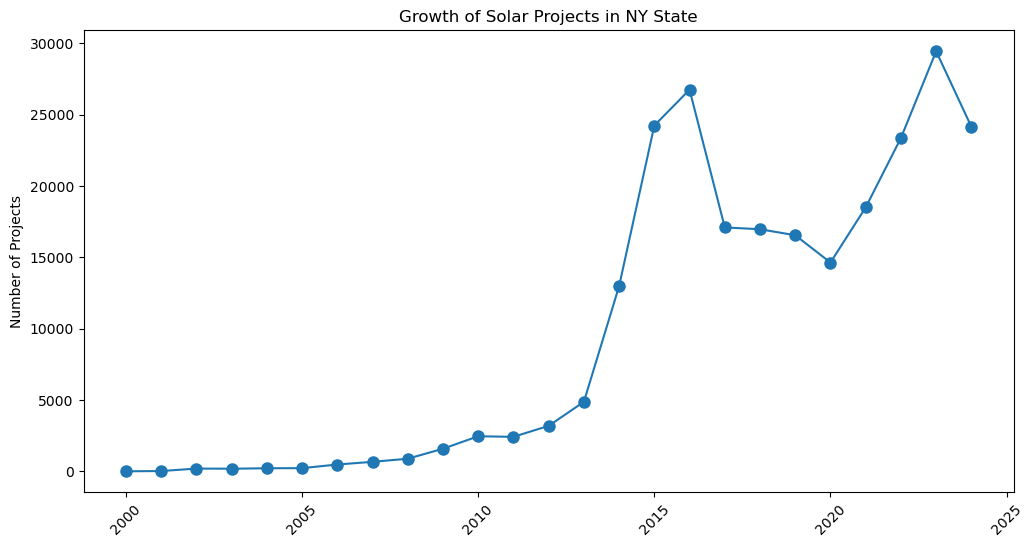

In [44]:
plt.figure(figsize=(12, 6))
projects_per_year.plot(kind='line', color='tab:blue', marker='o', linewidth=1.5, markersize=8)
plt.title('Growth of Solar Projects in NY State')
plt.xlabel('')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.show()

In [45]:
# NOW LETS LOOK AT ENERGY GROWTH OVER TIME USING THE 'estimated_annual_pv_energy_production_kwh' COLUMN

In [46]:
df['estimated_annual_pv_energy_production_kwh'].info()

<class 'pandas.core.series.Series'>
Index: 242103 entries, 84 to 244055
Series name: estimated_annual_pv_energy_production_kwh
Non-Null Count   Dtype
--------------   -----
242103 non-null  int64
dtypes: int64(1)
memory usage: 3.7 MB


In [47]:
energy_connection = df[['interconnection_year', 'estimated_annual_pv_energy_production_kwh', 'pv_system_size_kwac']].copy()

In [48]:
# Group by year and calculate the total energy production
# Here, we're summing up the 'estimated_annual_pv_energy_production_kwh' column for each year
energy_by_year = energy_connection.groupby('interconnection_year')['estimated_annual_pv_energy_production_kwh'].sum() 
energy_by_year

interconnection_year
2000          2802
2001         69921
2002        965380
2003       1227188
2004       1534527
2005       2098401
2006       4831291
2007       5193438
2008       7330583
2009      15794558
2010      31388002
2011      93096934
2012      67943245
2013      97982866
2014     198544770
2015     331893859
2016     380542920
2017     387991712
2018     506634777
2019     562467991
2020     639707193
2021     902981697
2022    1004237748
2023    1038769520
2024    1432526495
Name: estimated_annual_pv_energy_production_kwh, dtype: int64

In [49]:
# This focuses on the pv_system_size_kwac column, or system size per year.
ac_size_by_year = energy_connection.groupby('interconnection_year')['pv_system_size_kwac'].sum()

In [50]:
ac_size_by_year

interconnection_year
2000         2.04
2001        50.91
2002       702.91
2003       893.55
2004      1116.57
2005      1522.78
2006      3500.92
2007      3775.01
2008      5325.54
2009     11462.54
2010     22720.34
2011     61544.86
2012     47485.98
2013     69191.08
2014    141381.34
2015    234181.60
2016    266956.32
2017    262609.63
2018    333842.50
2019    368607.76
2020    413711.73
2021    582476.98
2022    651725.24
2023    678732.49
2024    915984.41
Name: pv_system_size_kwac, dtype: float64

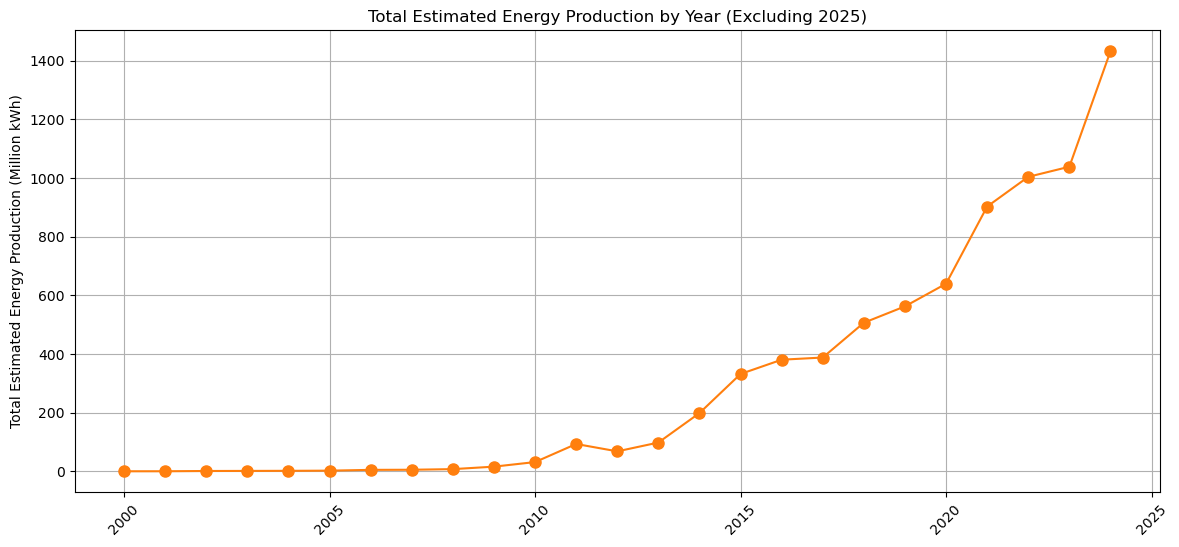

In [51]:
energy_by_year = energy_connection.groupby('interconnection_year')['estimated_annual_pv_energy_production_kwh'].sum() / 1_000_000  # Convert kWh to millions

# Plotting the energy production trend by year
plt.figure(figsize=(14, 6))
energy_by_year.plot(kind='line', color='tab:orange', marker='o', linewidth=1.5, markersize=8)

# Add labels and title
plt.title('Total Estimated Energy Production by Year (Excluding 2025)')
plt.ylabel('Total Estimated Energy Production (Million kWh)')
plt.xlabel('')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

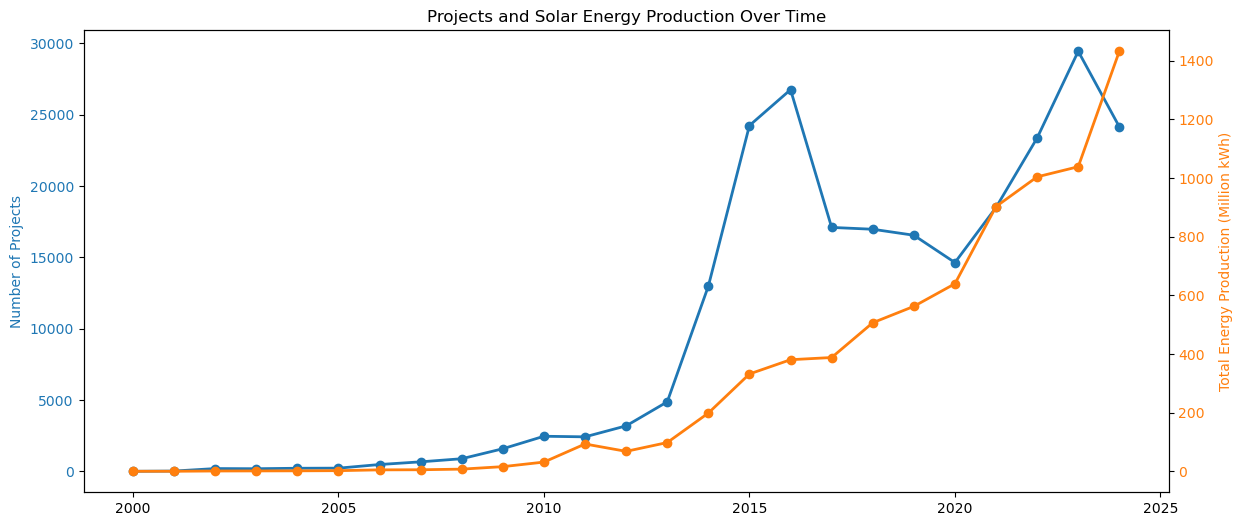

In [52]:
projects_per_year = df['interconnection_year'].value_counts().sort_index()

# 2. Group by 'interconnection_year' and sum the 'estimated_annual_pv_energy_production_kwh' for total energy production
energy_per_year = df.groupby('interconnection_year')['estimated_annual_pv_energy_production_kwh'].sum() / 1_000_000  # Convert kWh to millions

# 3. Plotting both growth and energy production in one plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot for number of projects (on the left y-axis)
ax1.set_xlabel('')
ax1.set_ylabel('Number of Projects', color='tab:blue')
ax1.plot(projects_per_year.index, projects_per_year.values, color='tab:blue', marker='o', label='Number of Projects', linewidth=2)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for energy production
ax2 = ax1.twinx()  
ax2.set_ylabel('Total Energy Production (Million kWh)', color='tab:orange')  
ax2.plot(energy_per_year.index, energy_per_year.values, color='tab:orange', marker='o', label='Energy Production', linewidth=2)
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Title and final adjustments
plt.title('Projects and Solar Energy Production Over Time')
plt.show()

1. Policy & Incentive Changes

    NYSERDA or federal programs might’ve shifted during this time.

    For example, changes to:

        Net metering rules

        Tax credits (like the federal Investment Tax Credit, ITC, beginning its phase-down)

        Interconnection procedures or cost-sharing

2. Regulatory Bottlenecks

    There could have been delays in project approvals from utilities or state agencies.

    New interconnection standards or increased permitting time could slow things down.

3. Market Saturation in Some Areas

    Some regions might’ve already hit capacity limits on circuits or substations, limiting new installs.

4. Supply Chain or Developer Shifts

    Developers might have paused due to uncertainty, technology costs, or shifting to larger utility-scale projects not tracked in this dataset.

5. Transition to CDG (Community Distributed Generation)

    NY ramped up CDG around 2015–2016. There may have been growing pains or restructuring in the solar industry during the transition to new project models.

In [54]:
dip_years = df[df['interconnection_year'].isin([2017, 2018, 2019])]

In [55]:
summary_dip_years = dip_years.groupby('interconnection_year').agg({
    'pv_system_size_kwac': ['mean', 'median'],
    'estimated_annual_pv_energy_production_kwh': 'sum',
    'project_id': 'count'  
})

In [56]:
summary_dip_years.columns = ['mean_kwac_size', 'median_kwac_size', 'total_energy_kwh', 'num_projects']
# You typically use .reset_index() after a groupby operation or when your dataframe index holds meaningful data you want as a column.
summary_dip_years = summary_dip_years.reset_index()

In [57]:
summary_dip_years

,interconnection_year,mean_kwac_size,median_kwac_size,total_energy_kwh,num_projects
0,2017,15.356390,6.0,387991712,17101
1,2018,19.669033,6.0,506634777,16971
2,2019,22.268336,6.0,562467991,16553


Insights from 2017–2019

    While the number of projects steadily decreased from 17,101 in 2017 to 16,553 in 2019:

        Total energy production increased significantly:

            388M → 507M → 562M kWh

        This suggests that individual systems were getting larger or more efficient.

    System Size is Growing:

        The average pv_system_size_kwac increased from ~15.4 kW in 2017 to ~22.3 kW in 2019.

        But the median stayed at 6 kW, which might mean:

            A few very large projects skewed the mean upward.

            Residential-sized systems (~6 kW) still dominate in volume.

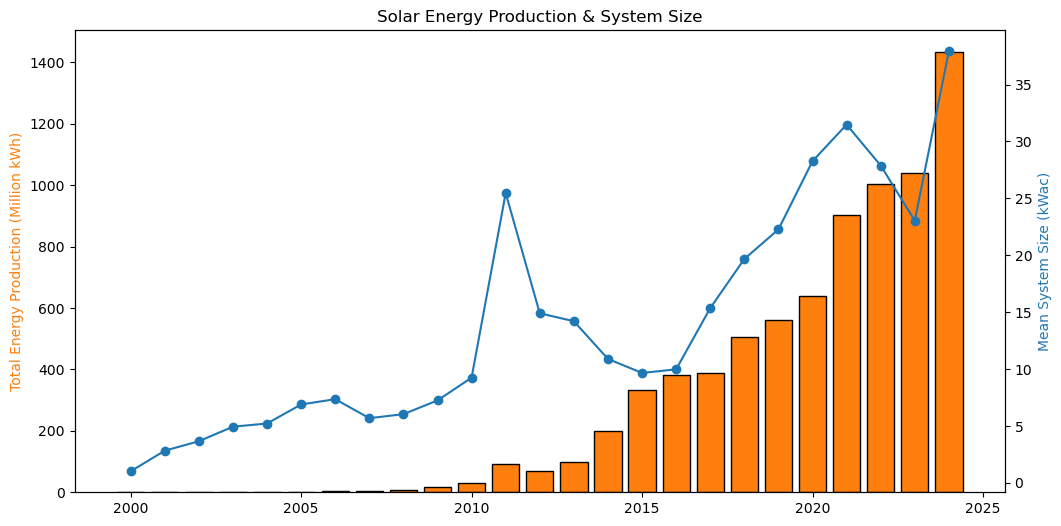

In [59]:
# Groups your DataFrame (df) by year using the column interconnection_year.
# For each year: Calculates the average AC system size (pv_system_size_kwac).
#                Calculates the total estimated annual PV energy production (estimated_annual_pv_energy_production_kwh).
# Resets the index, so interconnection_year becomes a column instead of the index.


yearly_summary = df.groupby('interconnection_year').agg({
    'pv_system_size_kwac': 'mean',
    'estimated_annual_pv_energy_production_kwh': 'sum'
}).reset_index()

# Convert kWh to millions for easier or clearer understanding
yearly_summary['estimated_annual_pv_energy_production_kwh'] /= 1_000_000


fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for energy production
ax1.bar(
    yearly_summary['interconnection_year'],
    yearly_summary['estimated_annual_pv_energy_production_kwh'],
    color='tab:orange',
    edgecolor='black',
    label='Total Energy Production (Million kWh)'
)
ax1.set_ylabel('Total Energy Production (Million kWh)', color='tab:orange')
ax1.set_xlabel('')
ax1.set_title('Solar Energy Production & System Size')

# Line plot for mean system size
ax2 = ax1.twinx()
ax2.plot(
    yearly_summary['interconnection_year'],
    yearly_summary['pv_system_size_kwac'],
    color='tab:blue',
    marker='o',
    linewidth=1.5,
    label='Mean System Size (kWac)'
)
ax2.set_ylabel('Mean System Size (kWac)', color='tab:blue')
plt.show()

ENERGY PRODUCTION BY REGION

In [61]:
energy_by_city = df.groupby('citytown')['estimated_annual_pv_energy_production_kwh'].sum().sort_values(ascending=False) / 1_000_000

In [62]:
print(energy_by_city)

citytown
Staten Island        187.208575
Brooklyn             139.892540
Bronx                 97.857589
Auburn                73.679930
Amsterdam             70.229378
                        ...    
Ontario Center         0.003433
Fort Miller            0.003433
Allentown              0.003433
Wales Center           0.002362
Thousand Isl Park      0.001992
Name: estimated_annual_pv_energy_production_kwh, Length: 1932, dtype: float64


In [63]:
energy_by_utility = df.groupby('utility')['estimated_annual_pv_energy_production_kwh'].sum().sort_values(ascending=False) / 1_000_000

In [64]:
energy_by_utility

utility
National Grid     2970.848955
PSEGLI            1343.594537
NYSEG             1240.203616
Con Ed             960.343019
Central Hudson     490.281621
RGE                357.055973
O&R                353.430097
Name: estimated_annual_pv_energy_production_kwh, dtype: float64

In [65]:
# .unstack() transforms groupby results from long format to wide table style format.
utility_trend = df.groupby(['interconnection_year', 'utility'])['estimated_annual_pv_energy_production_kwh'].sum().unstack() / 1_000_000

In [66]:
utility_trend

utility,Central Hudson,Con Ed,NYSEG,National Grid,O&R,PSEGLI,RGE
interconnection_year,,,,,,,
2000,NaN,NaN,NaN,NaN,NaN,0.002802,NaN
2001,0.002747,0.002747,0.029418,NaN,0.008927,0.026082,NaN
2002,0.024720,0.019228,0.043947,0.004944,0.002747,0.857571,0.012223
2003,0.111792,0.046008,0.239375,0.010712,NaN,0.819301,NaN
2004,0.196662,0.124663,0.336680,0.022386,0.030214,0.807305,0.016617
2005,0.350760,0.449413,0.287523,0.015519,0.041476,0.930363,0.023347
2006,0.504309,0.738523,0.846248,0.641270,0.272649,1.797529,0.030763
2007,0.805262,0.688646,0.687685,0.817846,0.232926,1.880829,0.080244
2008,0.980421,0.956700,0.802456,0.917978,0.328950,3.265657,0.078421


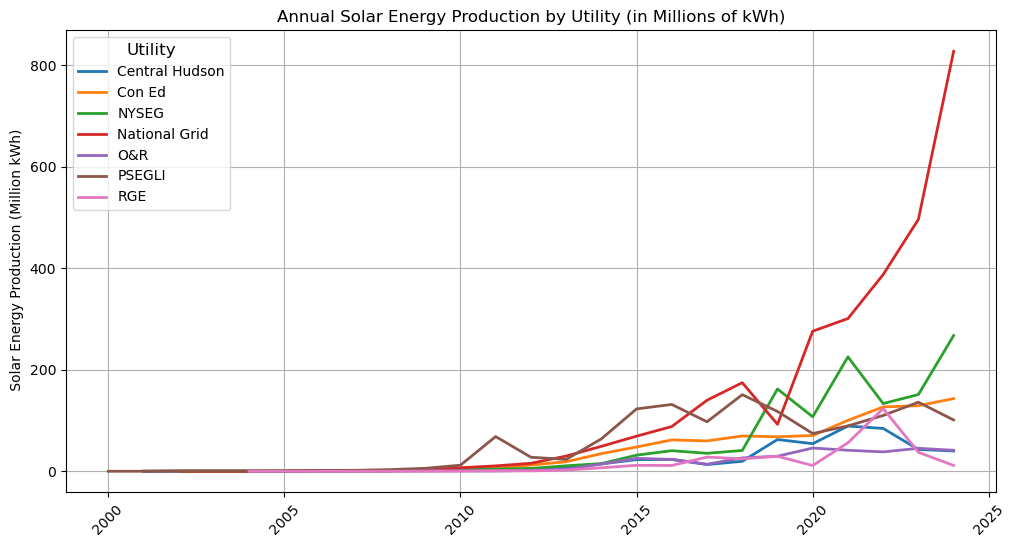

In [67]:
fig, ax = plt.subplots(figsize=(12, 6))  
utility_trend.plot(kind='line', linewidth=2, ax=ax)


ax.set_title('Annual Solar Energy Production by Utility (in Millions of kWh)')
ax.set_xlabel('')
ax.set_ylabel(' Solar Energy Production (Million kWh)')


ax.grid(True)
plt.xticks(rotation=45)


ax.legend(loc='upper left', fontsize=10, title='Utility', title_fontsize=12, frameon=True)  

plt.show()

In [68]:
recent_trend = utility_trend.loc[2020:2024].sum().sort_values(ascending=False)
print(recent_trend)

utility
National Grid     2288.882992
NYSEG              885.068256
Con Ed             570.197306
PSEGLI             511.025582
Central Hudson     310.945276
RGE                239.955512
O&R                212.147729
dtype: float64


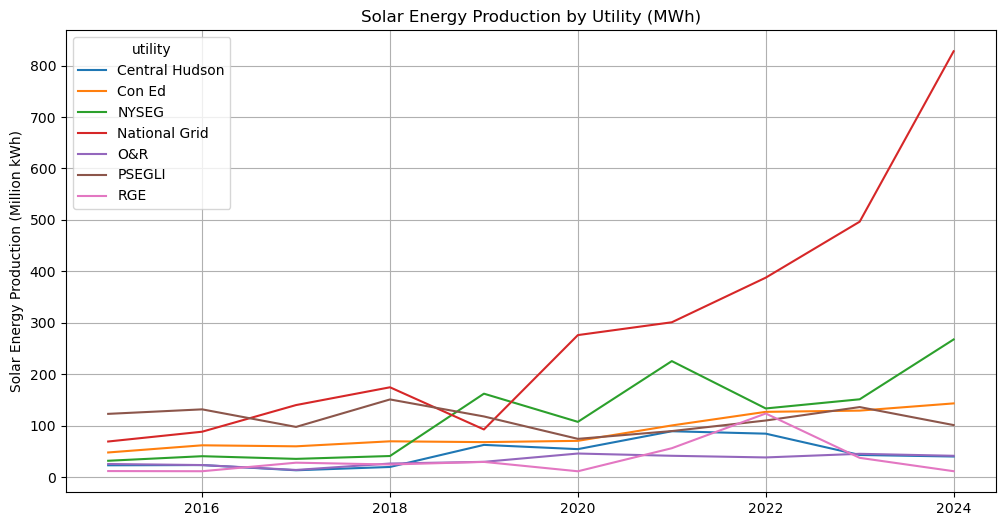

In [69]:
utility_trend.loc[2015:].plot(figsize=(12, 6), title='Solar Energy Production by Utility (MWh)')
plt.ylabel('Solar Energy Production (Million kWh)')
plt.xlabel('')
plt.grid(True)
ax.legend(loc='upper left', fontsize=10, title='Utility', title_fontsize=12, frameon=True)
plt.show()

Con Ed = Con Edison (NYC area, especially Manhattan, Bronx, parts of Queens and Westchester)

National Grid = Covers Brooklyn, Staten Island, parts of Long Island and Upstate

PSEGLI = PSEG Long Island

O&R = Orange & Rockland

RGE = Rochester Gas & Electric

NYSEG = New York State Electric & Gas

Central Hudson = Mid-Hudson Valley region

In [71]:
developer_projects = df.groupby('developer').size().sort_values(ascending=False)

In [72]:
developer_projects

developer
MOMENTUM SOLAR                                        15784
Sunrun Inc                                            14963
Vivint Solar                                          12805
Solar City                                            11620
Other                                                  6528
                                                      ...  
Kathy Maine (Maine Technical Services, Inc)               1
Kathy Haake (EDF Renewables Distributed Solutions,        1
Kathy Haake (EDF Renewables Distributed Solutions         1
Kathleen Cooke (My Solar Grid)                            1
wholesale solar                                           1
Length: 2815, dtype: int64

In [73]:
developer_energy_production = df.groupby('developer')['estimated_annual_pv_energy_production_kwh'].sum().sort_values(ascending=False)

In [74]:
developer_energy_production

developer
Generate Capital, Inc                           163392421
Atlus Power, LLC                                156731723
Robert Tompkins (Borrego Solar Systems, Inc)    144818986
Other                                           132462589
Solar City                                      117349157
                                                  ...    
Appolo Heating Inc.                                  1044
Justin Williams (Justin)                              824
ruvim bushmich (alpha auto)                           824
Prism Solar Technologies                              330
Michele Csapo (Vivint Solar)                          316
Name: estimated_annual_pv_energy_production_kwh, Length: 2815, dtype: int64

In [75]:
developer_energy_production_top_25 = developer_energy_production.sort_values(ascending=False).head(25)

In [76]:
developer_energy_production_top_25

developer
Generate Capital, Inc                               163392421
Atlus Power, LLC                                    156731723
Robert Tompkins (Borrego Solar Systems, Inc)        144818986
Other                                               132462589
Solar City                                          117349157
Sunrun Inc                                          114365050
MOMENTUM SOLAR                                      109381422
Vivint Solar                                        105652254
EnterSolar                                           99613071
Delaware River Solar, LLC                            72778829
Borrego Solar Systems, Inc                           70136775
Sean McCleneghen (Active Solar Development)          69305984
Nexamp                                               63103173
SolarCity                                            59661072
Long Island Power Solutions                          58072394
Roberto Sanchez (AETS Development Holdings, LLC)     5669647

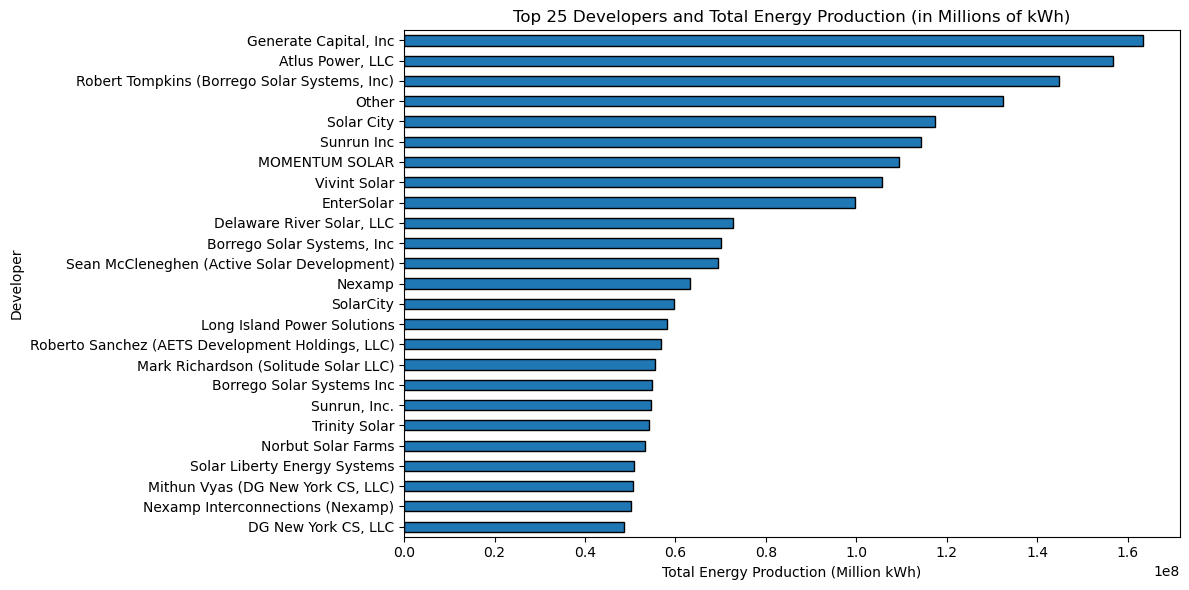

In [77]:
# Plotting the sorted data
plt.figure(figsize=(12, 6))
developer_energy_production_top_25.plot(kind='barh', color='tab:blue', edgecolor='black')

plt.title('Top 25 Developers and Total Energy Production (in Millions of kWh)')
plt.xlabel('Total Energy Production (Million kWh)')
plt.ylabel('Developer')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest at the top
plt.tight_layout()
plt.show()

In [78]:
energy_and_projects_by_area

,total_projects,total_energy_production
county,,
Suffolk,56019,940014617
Nassau,35746,397677075
Queens,27592,266345396
Staten Island,14427,188846018
Westchester,14274,280606883
...,...,...
Allegany,179,111359385
Schuyler,135,11528662
Lewis,102,57313246


In [79]:
# This metric helps identify counties with fewer, larger-scale projects (like solar farms) vs many smaller ones (like residential rooftops).

energy_and_projects_by_area['avg_energy_per_project'] = (
    energy_and_projects_by_area['total_energy_production'] / energy_and_projects_by_area['total_projects']
)

In [80]:
energy_and_projects_by_area

,total_projects,total_energy_production,avg_energy_per_project
county,,,
Suffolk,56019,940014617,16780.281994
Nassau,35746,397677075,11125.079030
Queens,27592,266345396,9652.993476
Staten Island,14427,188846018,13089.763499
Westchester,14274,280606883,19658.601864
...,...,...,...
Allegany,179,111359385,622119.469274
Schuyler,135,11528662,85397.496296
Lewis,102,57313246,561894.568627


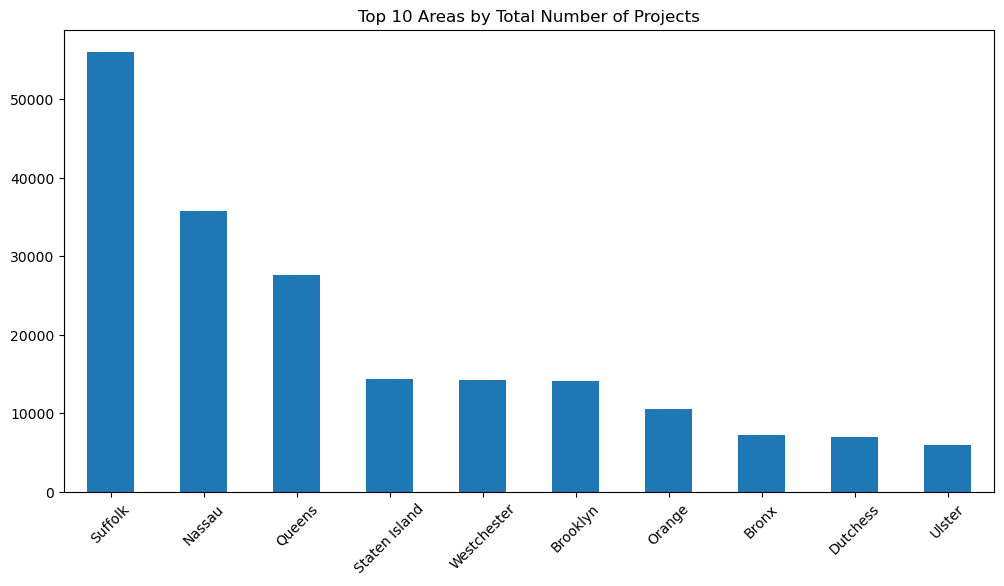

In [81]:
energy_and_projects_by_area['total_projects'].head(10).plot(kind='bar', color='tab:blue', figsize=(12, 6))
plt.title('Top 10 Areas by Total Number of Projects')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()

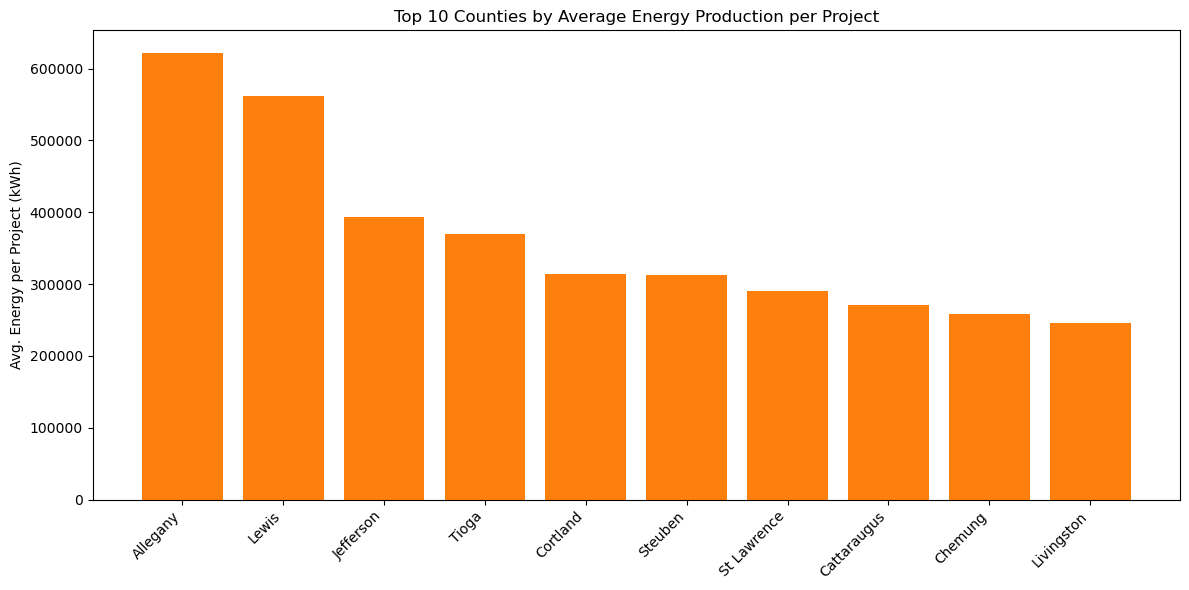

In [82]:
top_avg_energy = energy_and_projects_by_area.sort_values(by='avg_energy_per_project', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_avg_energy.index, top_avg_energy['avg_energy_per_project'], color='tab:orange')
plt.ylabel('Avg. Energy per Project (kWh)')
plt.xlabel('')
plt.title('Top 10 Counties by Average Energy Production per Project')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [83]:
project_density = df.groupby('citytown').agg(
    total_projects=('number_of_projects', 'sum'),
    total_energy_production=('estimated_annual_pv_energy_production_kwh', 'sum')
)

In [84]:
project_density['avg_energy_per_project'] = project_density['total_energy_production'] / project_density['total_projects']

In [85]:
project_density

,total_projects,total_energy_production,avg_energy_per_project
citytown,,,
Accord,146,8361863,57273.034247
Acra,14,149044,10646.000000
Adams,17,14996816,882165.647059
Adams Center,15,239791,15986.066667
Addison,5,51090,10218.000000
...,...,...,...
Yorktown Heights,448,16175649,36106.359375
Yorkville,10,116019,11601.900000
Youngstown,43,1807666,42038.744186


In [86]:
top_by_efficiency = project_density.sort_values(by='avg_energy_per_project', ascending=False).head(10)

In [87]:
print(top_by_efficiency)

               total_projects  total_energy_production  avg_energy_per_project
citytown                                                                      
Troupsberg                  1                  8099496               8099496.0
Wadsworth                   1                  8099496               8099496.0
Lapeer                      3                 24298488               8099496.0
Sangerfield                 1                  8099496               8099496.0
Mt. Morris                  1                  8099496               8099496.0
Whitesville                 1                  8099496               8099496.0
Portage                     1                  8080057               8080057.0
Fayette                     1                  8080057               8080057.0
Benton                      1                  8079733               8079733.0
East Fishkill               1                  8067098               8067098.0


In [88]:
top_by_projects = project_density.sort_values(by='total_projects', ascending=False).head(10)
print(top_by_projects)

                total_projects  total_energy_production  \
citytown                                                  
Staten Island            14273                187208575   
Brooklyn                 13900                139892540   
Bronx                     7114                 97857589   
Jamaica                   4925                 40085240   
Yonkers                   2354                 29558224   
Lindenhurst               2243                 20821881   
Schenectady               2075                 55897802   
Bay Shore                 2052                 22590917   
Brentwood                 1953                 28711391   
Queens Village            1908                 13919006   

                avg_energy_per_project  
citytown                                
Staten Island             13116.273734  
Brooklyn                  10064.211511  
Bronx                     13755.635226  
Jamaica                    8139.135025  
Yonkers                   12556.594732  
Lind

In [89]:
top_by_efficiency = project_density.sort_values(by='avg_energy_per_project', ascending=False).head(10)
print(top_by_efficiency)

               total_projects  total_energy_production  avg_energy_per_project
citytown                                                                      
Troupsberg                  1                  8099496               8099496.0
Wadsworth                   1                  8099496               8099496.0
Lapeer                      3                 24298488               8099496.0
Sangerfield                 1                  8099496               8099496.0
Mt. Morris                  1                  8099496               8099496.0
Whitesville                 1                  8099496               8099496.0
Portage                     1                  8080057               8080057.0
Fayette                     1                  8080057               8080057.0
Benton                      1                  8079733               8079733.0
East Fishkill               1                  8067098               8067098.0


In [90]:
top_counties = energy_and_projects_by_area.sort_values(by='total_energy_production', ascending=False).head(10)

In [91]:
print(top_counties)

             total_projects  total_energy_production  avg_energy_per_project
county                                                                      
Suffolk               56019                940014617            16780.281994
Nassau                35746                397677075            11125.079030
Orange                10493                389101018            37081.961117
Monroe                 2417                301598288           124782.080265
Westchester           14274                280606883            19658.601864
Queens                27592                266345396             9652.993476
Onondaga               1736                259755981           149629.021313
Erie                   3879                228246639            58841.618716
St Lawrence             724                210240106           290386.886740
Jefferson               530                208705018           393783.052830


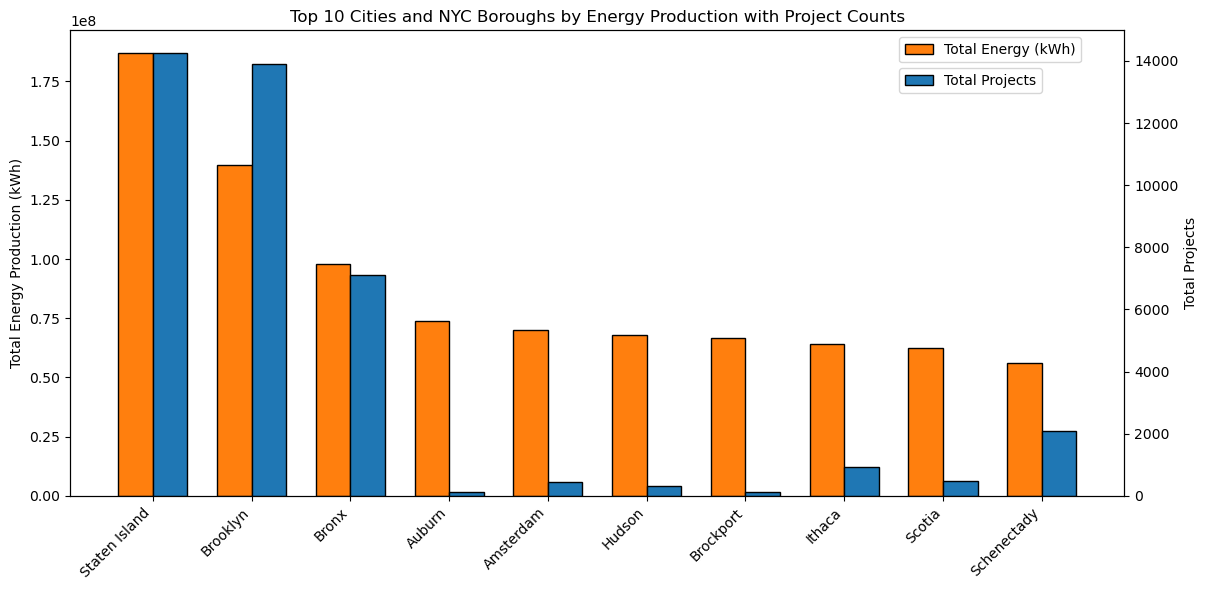

In [92]:
top_producers = project_density.sort_values(by='total_energy_production', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()

x = np.arange(len(top_producers))  # Define x positions
width = 0.35

bars1 = ax1.bar(x - width/2, top_producers['total_energy_production'], width=width, color='tab:orange', edgecolor='black', label='Total Energy (kWh)')
bars2 = ax2.bar(x + width/2, top_producers['total_projects'], width=width, color='tab:blue', edgecolor='black', label='Total Projects')

ax1.set_ylabel('Total Energy Production (kWh)')
ax2.set_ylabel('Total Projects')
ax1.set_xlabel('')
ax1.set_title('Top 10 Cities and NYC Boroughs by Energy Production with Project Counts')
ax1.set_xticks(x)
ax1.set_xticklabels(top_producers.index, rotation=45, ha='right')

ax1.legend(loc='upper left', bbox_to_anchor=(.78, 1))
ax2.legend(loc='lower left', bbox_to_anchor=(.78, 0.85))


plt.tight_layout(rect=[0, 0, 0.87, 1])
plt.show()


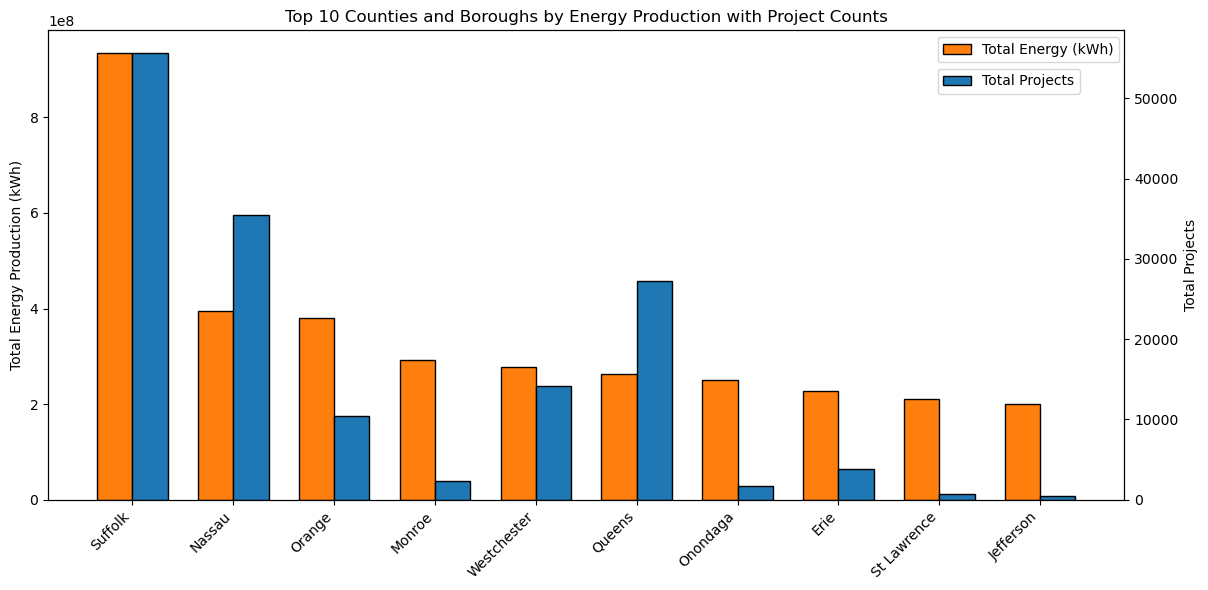

In [93]:
county_data = df.groupby('county').agg(
    total_energy_production=('estimated_annual_pv_energy_production_kwh', 'sum'),
    total_projects=('number_of_projects', 'sum')
).reset_index()


top_county_data = county_data.sort_values(by='total_energy_production', ascending=False).head(10)


fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()


bars1 = ax1.bar(x - width/2, top_county_data['total_energy_production'], width=width, color='tab:orange',edgecolor='black', label='Total Energy (kWh)')
bars2 = ax2.bar(x + width/2, top_county_data['total_projects'], width=width, color='tab:blue', edgecolor='black', label='Total Projects')


ax1.set_ylabel('Total Energy Production (kWh)')
ax2.set_ylabel('Total Projects')
ax1.set_xlabel('')
ax1.set_title('Top 10 Counties and Boroughs by Energy Production with Project Counts')
ax1.set_xticks(x)
ax1.set_xticklabels(top_county_data['county'], rotation=45, ha='right')


ax1.legend(loc='upper left', bbox_to_anchor=(.82, 1))
ax2.legend(loc='lower left', bbox_to_anchor=(.82, 0.85))


plt.tight_layout(rect=[0, 0, 0.87, 1])
plt.show()


In [94]:
df[['estimated_pv_system_size_kwdc', 'pv_system_size_kwac', 'estimated_annual_pv_energy_production_kwh']].isnull().sum()

estimated_pv_system_size_kwdc                1
pv_system_size_kwac                          1
estimated_annual_pv_energy_production_kwh    0
dtype: int64

In [95]:
df['estimated_pv_system_size_kwdc'] = pd.to_numeric(df['estimated_pv_system_size_kwdc'], errors='coerce')
df['pv_system_size_kwac'] = pd.to_numeric(df['pv_system_size_kwac'], errors='coerce')

In [96]:
# Convert 'interconnection_date' to datetime format and extract the year
df['interconnection_year'] = pd.to_datetime(df['interconnection_date'], errors='coerce').dt.year

# Group by interconnection year to find the average system sizes and energy production
avg_system_size_kwdc = df.groupby('interconnection_year')['estimated_pv_system_size_kwdc'].mean()
avg_system_size_kwac = df.groupby('interconnection_year')['pv_system_size_kwac'].mean()
avg_energy_production = df.groupby('interconnection_year')['estimated_annual_pv_energy_production_kwh'].mean()

In [97]:
system_size_energy_table = pd.DataFrame({
    'Year': avg_system_size_kwdc.index,
    'Avg. System Size (DC) - kW': avg_system_size_kwdc.values,
    'Avg. System Size (AC) - kW': avg_system_size_kwac.values,
    'Avg. Energy Production (kWh)': avg_energy_production.values
})

# Display the table
print(system_size_energy_table)

    Year  Avg. System Size (DC) - kW  Avg. System Size (AC) - kW  \
0   2000                    1.190000                    1.020000   
1   2001                    3.310556                    2.828333   
2   2002                    4.284063                    3.660990   
3   2003                    5.776298                    4.936740   
4   2004                    6.109813                    5.217617   
5   2005                    8.089955                    6.890407   
6   2006                    8.647290                    7.354874   
7   2007                    6.663389                    5.685256   
8   2008                    7.080465                    6.038027   
9   2009                    8.505619                    7.245601   
10  2010                   10.878779                    9.243426   
11  2011                   32.813475                   25.463326   
12  2012                   18.161845                   14.899900   
13  2013                   17.136676            

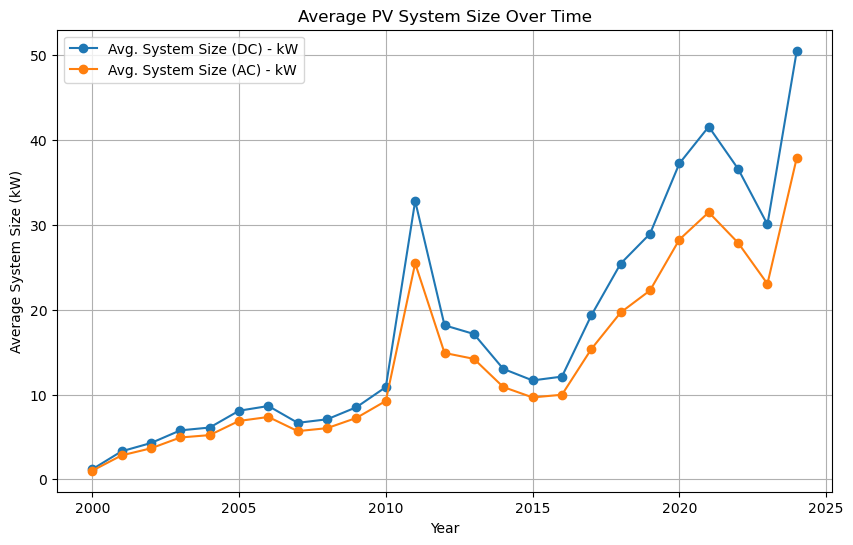

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(avg_system_size_kwdc, label='Avg. System Size (DC) - kW', marker='o')
plt.plot(avg_system_size_kwac, label='Avg. System Size (AC) - kW', marker='o')
plt.xlabel('Year')
plt.ylabel('Average System Size (kW)')
plt.title('Average PV System Size Over Time')
plt.legend()
plt.grid(True)
plt.show()


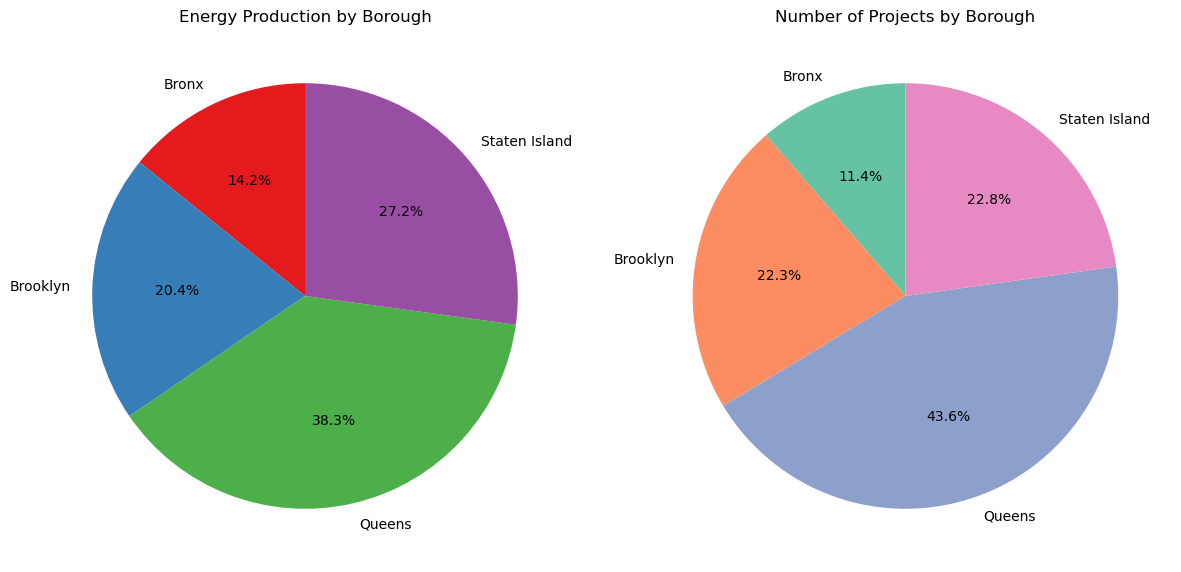

In [99]:
energy_boros = borough_df_aggregated['estimated_annual_pv_energy_production_kwh']
projects_boros = borough_df_aggregated['number_of_projects']
borough_names = borough_df_aggregated.index


colors_energy = sns.color_palette("Set1",)
colors_projects = sns.color_palette("Set2",)


plt.figure(figsize=(12, 6))

# autopct='%1.1f%%' is used in pie charts with to display percentage labels on each slice of the pie.
# '1.1f': This means 1 digit before the decimal and 1 digit after the decimal.
# '%%': The double percent is needed to escape the % in a string format.
plt.subplot(1, 2, 1)
plt.pie(energy_boros, labels=borough_names, autopct='%1.1f%%', startangle=90, colors=colors_energy)
plt.title('Energy Production by Borough')


plt.subplot(1, 2, 2)
plt.pie(projects_boros, labels=borough_names, autopct='%1.1f%%', startangle=90, colors=colors_projects)
plt.title('Number of Projects by Borough')
plt.tight_layout()
plt.show()